In [2]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline







# Data Gathering

In [ ]:
Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210605, 210612, 210619,210626,
             210703,210710,210717,210724,210731
             ,210807,210814,210821,210828]

turnstiles_df = get_data(week_nums)

In [3]:
engine = create_engine("sqlite:///mta.db")

In [ ]:
# run this to add the data to a table in the database
turnstiles_df.to_sql('MTA',engine,if_exists='append',index=False)

In [4]:
df = pd.read_sql('SELECT * FROM MTA;', engine)



In [5]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


# Data Asses

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722581 entries, 2722609 to 0
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DATE       object        
 6   TIME       object        
 7   ENTRIES    int64         
 8   DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 207.7+ MB


In [7]:
print("Number of stations in the dataset")
len(df['STATION'].value_counts())

Number of stations in the dataset


379

In [8]:
mask = ((df["C/A"] == "R504") & 
(df["UNIT"] == "R276"))

In [9]:
mask = (
(df["UNIT"] == "R180") &
(df['STATION'] == '103 ST')
& (df['C/A'] != 'R252'))


In [10]:
df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


In [809]:
df.groupby(['C/A','UNIT','SCP','STATION','LINENAME']).ENTRIES.sum().reset_index()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,4150561720
1,A002,R051,02-00-01,59 ST,NQR456W,3673582449
2,A002,R051,02-03-00,59 ST,NQR456W,788196937
3,A002,R051,02-03-01,59 ST,NQR456W,885751289
4,A002,R051,02-03-02,59 ST,NQR456W,25015346
...,...,...,...,...,...,...
5014,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,2091054449
5015,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,417007320
5016,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,1731263609
5017,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,44


In [11]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


# CLEAN

In [12]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME)
df.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00


In [14]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2448636,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 04:00:00,2
1172385,N335,R158,01-00-03,KEW GARDENS,2021-06-20 18:30:00,2
2457222,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 00:00:00,2
2457223,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 04:00:00,2
2457224,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 08:00:00,2


In [15]:
mask = ((df["C/A"] == "R514") & 
(df["UNIT"] == "R094") & 
(df["SCP"] == "00-05-00") & 
(df["STATION"] == "ASTORIA BLVD")&
(df["DATE_TIME"].dt.day == 22)&
(df["DATE_TIME"].dt.month == 7))

df[mask].sort_values(by="DATE_TIME").head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1654898,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,REGULAR,3,0,2021-07-22 00:00:00
1654899,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,RECOVR AUD,262243,0,2021-07-22 00:00:00
1654900,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,REGULAR,3,0,2021-07-22 04:00:00
1654901,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,RECOVR AUD,262243,0,2021-07-22 04:00:00
1654902,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:39:19,REGULAR,3,0,2021-07-22 07:39:19


In [16]:
df.DESC.value_counts()


REGULAR       2710456
RECOVR AUD      12154
Name: DESC, dtype: int64

In [17]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [18]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-29 00:00:00,1
1815048,R138,R293,00-03-02,34 ST-PENN STA,2021-07-22 18:00:00,1
1815050,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 02:00:00,1
1815051,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 06:00:00,1
1815052,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 10:00:00,1


In [19]:
(((df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'])
              .ENTRIES.count().reset_index()
              .sort_values('ENTRIES', ascending=False))['ENTRIES']>1).sum())


0

In [20]:
df.DESC.value_counts()



REGULAR       2710456
RECOVR AUD      12125
Name: DESC, dtype: int64

In [21]:
# drop columns that not helpful for my analysis
df = df.drop(["EXITS", "DESC","DIVISION"], axis=1, errors="ignore")


In [22]:
df[df.isnull()==True].count()



C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DATE         0
TIME         0
ENTRIES      0
DATE_TIME    0
dtype: int64

## Find the hourly difference

### add some helpful columns

In [23]:
turnstiles_hourly = df.copy()

In [24]:
turnstiles_hourly['Day'] = turnstiles_hourly['DATE_TIME'].dt.day
turnstiles_hourly['Year'] = turnstiles_hourly['DATE_TIME'].dt.year
turnstiles_hourly['month'] = turnstiles_hourly['DATE_TIME'].dt.month
turnstiles_hourly['Weekday'] = turnstiles_hourly['DATE_TIME'].dt.weekday
turnstiles_hourly['week'] = turnstiles_hourly['DATE_TIME'].dt.week




<ipython-input-24-021da2965f34>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  turnstiles_hourly['week'] = turnstiles_hourly['DATE_TIME'].dt.week


In [25]:
turnstiles_hourly.head()

 

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,DATE_TIME,Day,Year,month,Weekday,week
2722609,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,21:00:00,5554,2021-08-27 21:00:00,27,2021,8,4,34
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,17:00:00,5554,2021-08-27 17:00:00,27,2021,8,4,34
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,13:00:00,5554,2021-08-27 13:00:00,27,2021,8,4,34
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,09:00:00,5554,2021-08-27 09:00:00,27,2021,8,4,34
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,05:00:00,5554,2021-08-27 05:00:00,27,2021,8,4,34


In [26]:
turnstiles_hourly['DAILY_ENTRIES']=turnstiles_hourly.groupby(['C/A', 'UNIT', 'STATION', 'LINENAME', 'SCP'])['ENTRIES'].diff()
turnstiles_hourly.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)
turnstiles_hourly


,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,DATE_TIME,Day,Year,month,Weekday,week,DAILY_ENTRIES
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,17:00:00,5554,2021-08-27 17:00:00,27,2021,8,4,34,0.0
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,13:00:00,5554,2021-08-27 13:00:00,27,2021,8,4,34,0.0
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,09:00:00,5554,2021-08-27 09:00:00,27,2021,8,4,34,0.0
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,05:00:00,5554,2021-08-27 05:00:00,27,2021,8,4,34,0.0
2722604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,01:00:00,5554,2021-08-27 01:00:00,27,2021,8,4,34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,16:00:00,7578897,2021-05-29 16:00:00,29,2021,5,5,21,-124.0
3,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,12:00:00,7578789,2021-05-29 12:00:00,29,2021,5,5,21,-108.0
2,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,08:00:00,7578749,2021-05-29 08:00:00,29,2021,5,5,21,-40.0
1,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,04:00:00,7578740,2021-05-29 04:00:00,29,2021,5,5,21,-9.0


In [27]:
turnstiles_hourly["FIXED_DAILY_ENTRIES"]=(
np.where((
    (turnstiles_hourly.ENTRIES ==0) & (turnstiles_hourly.DAILY_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET0 
    , 
    np.where((turnstiles_hourly.ENTRIES !=0) & (turnstiles_hourly.DAILY_ENTRIES < 0)
             , abs(turnstiles_hourly.DAILY_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
         turnstiles_hourly.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
))

In [28]:
turnstiles_hourly

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,DATE_TIME,Day,Year,month,Weekday,week,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,17:00:00,5554,2021-08-27 17:00:00,27,2021,8,4,34,0.0,0.0
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,13:00:00,5554,2021-08-27 13:00:00,27,2021,8,4,34,0.0,0.0
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,09:00:00,5554,2021-08-27 09:00:00,27,2021,8,4,34,0.0,0.0
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,05:00:00,5554,2021-08-27 05:00:00,27,2021,8,4,34,0.0,0.0
2722604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,01:00:00,5554,2021-08-27 01:00:00,27,2021,8,4,34,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,16:00:00,7578897,2021-05-29 16:00:00,29,2021,5,5,21,-124.0,124.0
3,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,12:00:00,7578789,2021-05-29 12:00:00,29,2021,5,5,21,-108.0,108.0
2,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,08:00:00,7578749,2021-05-29 08:00:00,29,2021,5,5,21,-40.0,40.0
1,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,04:00:00,7578740,2021-05-29 04:00:00,29,2021,5,5,21,-9.0,9.0


In [29]:
turnstiles_hourly = turnstiles_hourly.drop('DAILY_ENTRIES', axis=1, errors="ignore")

In [30]:
turnstiles_hourly[turnstiles_hourly['FIXED_DAILY_ENTRIES'] >= 500].shape[0]

9932

In [31]:
turnstiles_hourly.FIXED_DAILY_ENTRIES.max()

1383110319.0

# remove outlires

/Users/naif/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


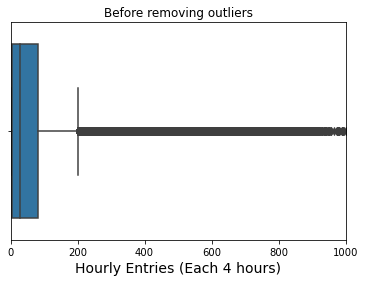

In [763]:
# check for outlires
sns.boxplot(turnstiles_hourly.FIXED_DAILY_ENTRIES)
plt.xlim(0,1000)
plt.title('Before removing outliers')
plt.xlabel("Hourly Entries (Each 4 hours)",fontsize=14)
plt.savefig('outlires.png')


In [33]:
Q1 = turnstiles_hourly.FIXED_DAILY_ENTRIES.quantile(0.25)
Q3 = turnstiles_hourly.FIXED_DAILY_ENTRIES.quantile(0.75)
Q1,Q3

(4.0, 83.0)

In [34]:
IQR = Q3 -Q1
IQR

79.0

In [35]:
lower_limit = Q1 -1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit,upper_limit


(-114.5, 201.5)

In [36]:
turnstiles_hourly[(turnstiles_hourly.FIXED_DAILY_ENTRIES<lower_limit)
                  | (turnstiles_hourly.FIXED_DAILY_ENTRIES>upper_limit)]

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,DATE_TIME,Day,Year,month,Weekday,week,FIXED_DAILY_ENTRIES
1257109,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,07/04/2021,21:00:00,3134207,2021-07-04 21:00:00,4,2021,7,6,26,206.0
2722439,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,08/27/2021,13:00:00,3832420,2021-08-27 13:00:00,27,2021,8,4,34,216.0
2722438,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,08/27/2021,09:00:00,3832182,2021-08-27 09:00:00,27,2021,8,4,34,238.0
2722428,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,08/25/2021,17:00:00,3830841,2021-08-25 17:00:00,25,2021,8,2,34,224.0
2722426,TRAM2,R469,00-00-01,RIT-ROOSEVELT,R,08/25/2021,09:00:00,3830414,2021-08-25 09:00:00,25,2021,8,2,34,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,A002,R051,02-00-00,59 ST,NQR456W,06/07/2021,16:00:00,7582810,2021-06-07 16:00:00,7,2021,6,0,23,259.0
40,A002,R051,02-00-00,59 ST,NQR456W,06/04/2021,16:00:00,7581637,2021-06-04 16:00:00,4,2021,6,4,22,226.0
34,A002,R051,02-00-00,59 ST,NQR456W,06/03/2021,16:00:00,7581050,2021-06-03 16:00:00,3,2021,6,3,22,278.0
28,A002,R051,02-00-00,59 ST,NQR456W,06/02/2021,16:00:00,7580468,2021-06-02 16:00:00,2,2021,6,2,22,286.0


In [37]:
hourly_fixed = turnstiles_hourly[(turnstiles_hourly.FIXED_DAILY_ENTRIES>lower_limit)
                  & (turnstiles_hourly.FIXED_DAILY_ENTRIES<upper_limit)]

In [38]:
# Number of outliers
turnstiles_hourly.shape[0] - hourly_fixed.shape[0]

190752

/Users/naif/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


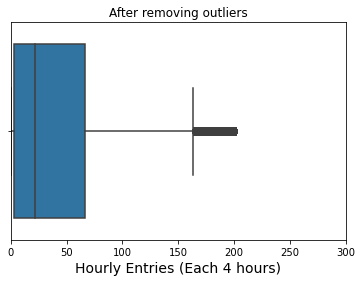

In [767]:
sns.boxplot(hourly_fixed.FIXED_DAILY_ENTRIES)
plt.xlim(0,300)
plt.title('After removing outliers')
plt.xlabel("Hourly Entries (Each 4 hours)",fontsize=14)
plt.savefig('outlires_fixed22.png')


In [41]:
hourly_fixed.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,DATE_TIME,Day,Year,month,Weekday,week,FIXED_DAILY_ENTRIES
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,17:00:00,5554,2021-08-27 17:00:00,27,2021,8,4,34,0.0
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,13:00:00,5554,2021-08-27 13:00:00,27,2021,8,4,34,0.0
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,09:00:00,5554,2021-08-27 09:00:00,27,2021,8,4,34,0.0
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,05:00:00,5554,2021-08-27 05:00:00,27,2021,8,4,34,0.0
2722604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,01:00:00,5554,2021-08-27 01:00:00,27,2021,8,4,34,0.0


# PLOT 1: 

In [42]:
station_daily = hourly_fixed.groupby(["STATION", "DATE",'Weekday'])[['FIXED_DAILY_ENTRIES']].sum().reset_index()
station_daily

,STATION,DATE,Weekday,FIXED_DAILY_ENTRIES
0,1 AV,05/29/2021,5,4970.0
1,1 AV,05/30/2021,6,4304.0
2,1 AV,05/31/2021,0,4492.0
3,1 AV,06/01/2021,1,5644.0
4,1 AV,06/02/2021,2,5383.0
...,...,...,...,...
34454,ZEREGA AV,08/23/2021,0,928.0
34455,ZEREGA AV,08/24/2021,1,807.0
34456,ZEREGA AV,08/25/2021,2,861.0
34457,ZEREGA AV,08/26/2021,3,774.0


In [43]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('FIXED_DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(10)

,STATION,Weekday,FIXED_DAILY_ENTRIES
0,34 ST-PENN STA,273,2563326.0
1,23 ST,273,1756794.0
2,86 ST,273,1659933.0
3,FULTON ST,273,1598493.0
4,42 ST-PORT AUTH,273,1470362.0
5,GRD CNTRL-42 ST,273,1459602.0
6,125 ST,273,1454644.0
7,59 ST,273,1304418.0
8,TIMES SQ-42 ST,273,1255571.0
9,34 ST-HERALD SQ,273,1235985.0


In [44]:
import matplotlib.cm
import matplotlib.colors

In [45]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#0051ba","#ffda1a"])
matplotlib.cm.register_cmap("mycolormap", cmap)
cpal = sns.color_palette("mycolormap")

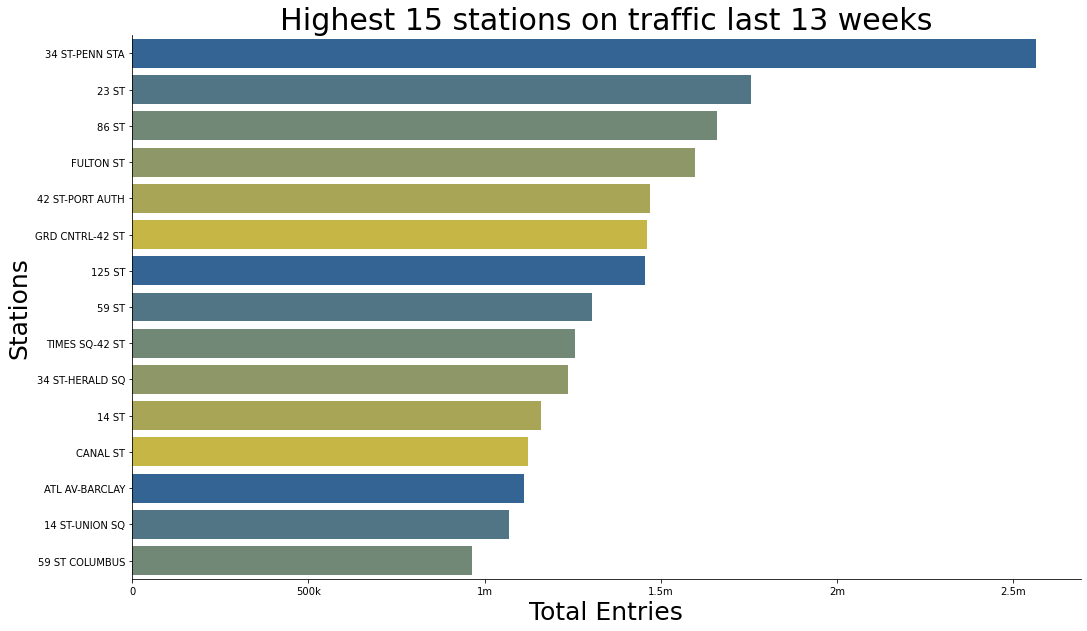

In [78]:
plt.subplots(figsize=(17,10))
ax=sns.barplot(x='FIXED_DAILY_ENTRIES',
               y='STATION', data=station_totals.head(15),palette =
          cpal)

sns.despine()
plt.xticks([0,500000,1000000,1500000,2000000,2500000],['0', '500k', '1m', '1.5m', '2m', '2.5m'])

plt.title('Highest 15 stations on traffic last 13 weeks',fontsize=30)
plt.xlabel("Total Entries",fontsize=25)
plt.ylabel("Stations",fontsize=25)
plt.savefig('traffic.png')

# PLOT 2:

In [801]:
x = hourly_fixed.groupby(["STATION", "DATE",'Weekday','week'])[['FIXED_DAILY_ENTRIES']].sum().reset_index()
x

,STATION,DATE,Weekday,week,FIXED_DAILY_ENTRIES
0,1 AV,05/29/2021,5,21,4970.0
1,1 AV,05/30/2021,6,21,4304.0
2,1 AV,05/31/2021,0,22,4492.0
3,1 AV,06/01/2021,1,22,5644.0
4,1 AV,06/02/2021,2,22,5383.0
...,...,...,...,...,...
34454,ZEREGA AV,08/23/2021,0,34,928.0
34455,ZEREGA AV,08/24/2021,1,34,807.0
34456,ZEREGA AV,08/25/2021,2,34,861.0
34457,ZEREGA AV,08/26/2021,3,34,774.0


In [802]:
lst = station_totals.STATION.head(15).tolist()
lst

['34 ST-PENN STA',
 '23 ST',
 '86 ST',
 'FULTON ST',
 '42 ST-PORT AUTH',
 'GRD CNTRL-42 ST',
 '125 ST',
 '59 ST',
 'TIMES SQ-42 ST',
 '34 ST-HERALD SQ',
 '14 ST',
 'CANAL ST',
 'ATL AV-BARCLAY',
 '14 ST-UNION SQ',
 '59 ST COLUMBUS']

In [803]:
weekday = x.groupby(['Weekday','STATION','week'])['FIXED_DAILY_ENTRIES']\
.sum().reset_index().sort_values('FIXED_DAILY_ENTRIES', ascending=False)

In [804]:
weekday

,Weekday,STATION,week,FIXED_DAILY_ENTRIES
20487,4,34 ST-PENN STA,24,32336.0
20488,4,34 ST-PENN STA,25,31731.0
10643,2,34 ST-PENN STA,22,31681.0
20493,4,34 ST-PENN STA,30,31644.0
20485,4,34 ST-PENN STA,22,31554.0
...,...,...,...,...
8254,1,JFK JAMAICA CT1,23,0.0
29218,5,TOMPKINSVILLE,30,0.0
29071,5,ST LAWRENCE AV,26,0.0
23714,4,ORCHARD BEACH,34,0.0


In [805]:
y = weekday[weekday['STATION'].isin(lst)]
y

,Weekday,STATION,week,FIXED_DAILY_ENTRIES
20487,4,34 ST-PENN STA,24,32336.0
20488,4,34 ST-PENN STA,25,31731.0
10643,2,34 ST-PENN STA,22,31681.0
20493,4,34 ST-PENN STA,30,31644.0
20485,4,34 ST-PENN STA,22,31554.0
...,...,...,...,...
32484,6,FULTON ST,33,6451.0
29715,6,14 ST,33,6304.0
30664,6,59 ST COLUMBUS,33,6293.0
24284,4,TIMES SQ-42 ST,34,6180.0


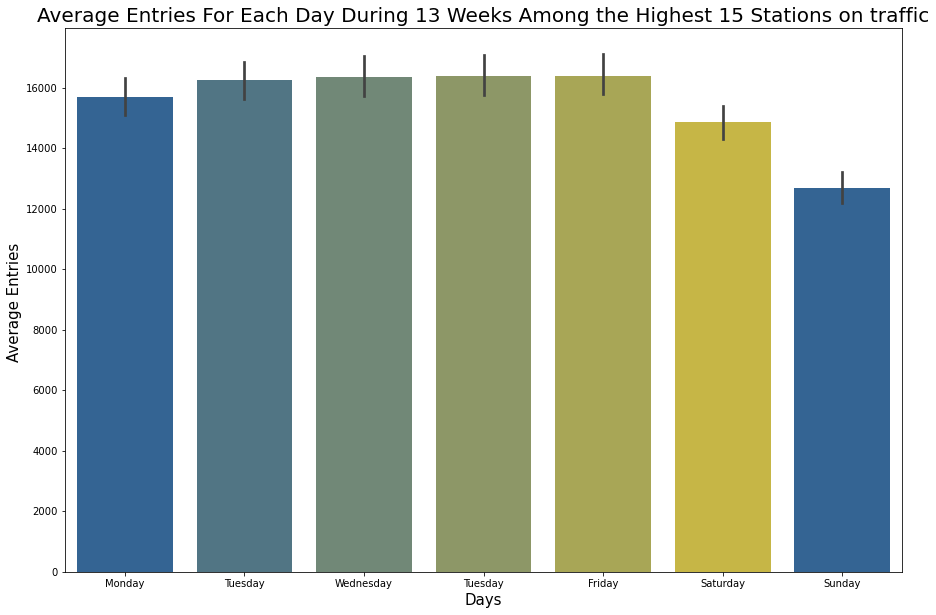

In [696]:
plt.subplots(figsize=(15,10))
ax=sns.barplot(x='Weekday', y='FIXED_DAILY_ENTRIES', data=y,palette =
          cpal)
plt.xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday', 'Sunday'])



plt.title('Average Entries For Each Day During 13 Weeks Among the Highest 15 Stations on traffic',fontsize=20)
plt.xlabel("Days",fontsize=15)
plt.ylabel("Average Entries ",fontsize=15)
plt.savefig('traffic2.png')




## Cutting off time slots

In [335]:
hourly_fixed['Hour'] = hourly_fixed['DATE_TIME'].dt.hour
hourly_fixed

<ipython-input-335-bf83278f73fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_fixed['Hour'] = hourly_fixed['DATE_TIME'].dt.hour


,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,DATE_TIME,Day,Year,month,Weekday,week,FIXED_DAILY_ENTRIES,HOUR,Hour
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,17:00:00,5554,2021-08-27 17:00:00,27,2021,8,4,34,0.0,17,17
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,13:00:00,5554,2021-08-27 13:00:00,27,2021,8,4,34,0.0,13,13
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,09:00:00,5554,2021-08-27 09:00:00,27,2021,8,4,34,0.0,9,9
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,05:00:00,5554,2021-08-27 05:00:00,27,2021,8,4,34,0.0,5,5
2722604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/27/2021,01:00:00,5554,2021-08-27 01:00:00,27,2021,8,4,34,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,16:00:00,7578897,2021-05-29 16:00:00,29,2021,5,5,21,124.0,16,16
3,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,12:00:00,7578789,2021-05-29 12:00:00,29,2021,5,5,21,108.0,12,12
2,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,08:00:00,7578749,2021-05-29 08:00:00,29,2021,5,5,21,40.0,8,8
1,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,04:00:00,7578740,2021-05-29 04:00:00,29,2021,5,5,21,9.0,4,4


In [336]:
hourly_fixed['Hour']=pd.cut(hourly_fixed['Hour'],[0,4,8,12,16,20,24],include_lowest=True)

<ipython-input-336-f2943e36138d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_fixed['Hour']=pd.cut(hourly_fixed['Hour'],[0,4,8,12,16,20,24],include_lowest=True)


In [337]:
hr = hourly_fixed.groupby(['Hour']).FIXED_DAILY_ENTRIES.sum().reset_index()
hr

,Hour,FIXED_DAILY_ENTRIES
0,"(-0.001, 4.0]",11162711.0
1,"(4.0, 8.0]",20387500.0
2,"(8.0, 12.0]",25531829.0
3,"(12.0, 16.0]",25866172.0
4,"(16.0, 20.0]",19538184.0
5,"(20.0, 24.0]",4880013.0


# PLOT 3:

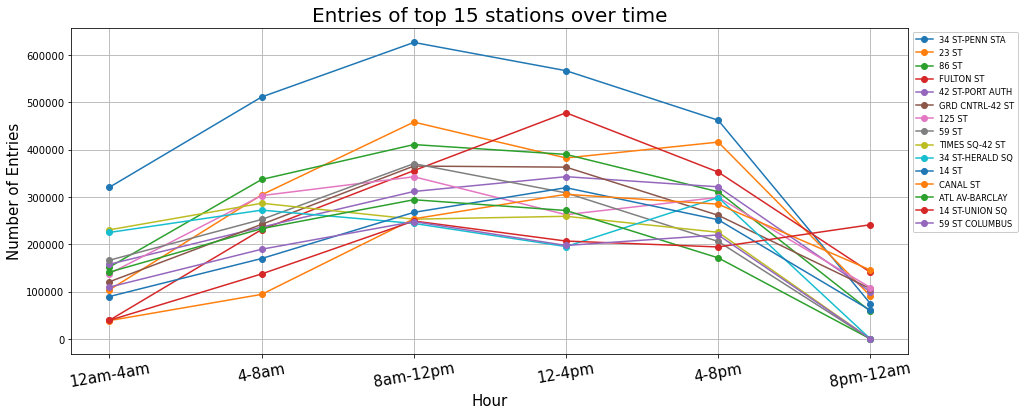

In [791]:
plt.figure(figsize=[15,6])


for name in lst:
            weekends=hourly_fixed[(hourly_fixed.STATION ==name)].groupby('Hour')['FIXED_DAILY_ENTRIES'].sum().reset_index()
            plt.plot(range(0,6), weekends.FIXED_DAILY_ENTRIES, 'o', label=name, linestyle='-')
            
            
plt.xticks(np.arange(6), ('12am-4am', '4-8am', '8am-12pm', '12-4pm', '4-8pm', '8pm-12am'), rotation=10, fontsize=15);
plt.title('Entries of top 15 stations over time' ,fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of Entries', fontsize=15)
plt.legend(framealpha=1, fontsize='small', bbox_to_anchor=(1,1))
plt.grid()
plt.savefig('weeks time.png')






        
        
        
        

# PLOT 4:

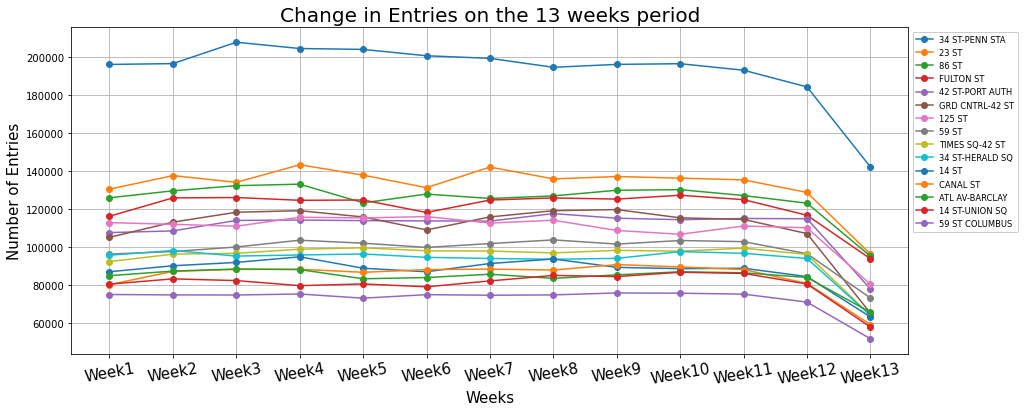

In [790]:
plt.figure(figsize=[15,6])


for name in lst:
            weekends=hourly_fixed[(hourly_fixed.STATION ==name)].groupby('week')['FIXED_DAILY_ENTRIES'].sum().reset_index()
            weekends = weekends[weekends['week']!=21]
            plt.plot(range(0,13), weekends.FIXED_DAILY_ENTRIES, 'o', label=name, linestyle='-')
            
            
plt.xticks(np.arange(13), ('Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week6',
                          'Week7', 'Week8', 'Week9', 'Week10', 'Week11', 'Week12',
                           'Week13'
                          ), rotation=10, fontsize=15);
plt.title('Change in Entries on the 13 weeks period',fontsize=20)
plt.xlabel('Weeks', fontsize=15)
plt.ylabel('Number of Entries', fontsize=15)
plt.legend(framealpha=1, fontsize='small', bbox_to_anchor=(1,1))
plt.grid()

plt.savefig('weeks weeks.png')





        
        
        
        

# LAST PLOTS:

In [786]:
def draw(name):
            weekdays=hourly_fixed[(hourly_fixed.Weekday<5) & (hourly_fixed.STATION == name)].groupby('Hour')['FIXED_DAILY_ENTRIES'].sum().reset_index()
            weekends=hourly_fixed[(hourly_fixed.Weekday>=5) &(hourly_fixed.STATION ==name)].groupby('Hour')['FIXED_DAILY_ENTRIES'].sum().reset_index()

            plt.figure(figsize=[15,6])
            plt.title(name,fontsize=20)
            plt.plot(range(0,6), weekdays.FIXED_DAILY_ENTRIES, 'o', color="#0051ba", label='Weekdays', linestyle='-')
            plt.plot(range(0,6), weekends.FIXED_DAILY_ENTRIES, 'o', color="#8B8000", label='Weekends', linestyle='-')
            plt.xticks(np.arange(6), ('12am-4am', '4-8am', '8am-12pm', '12-4pm', '4-8pm', '8pm-12am'), rotation=10, fontsize=15);
            plt.xlabel('Hour', fontsize=15)
            plt.ylabel('Number of Entries', fontsize=15)
            plt.legend(loc='upper right',fontsize=20)
            plt.grid()
            plt.savefig('1.png')


            






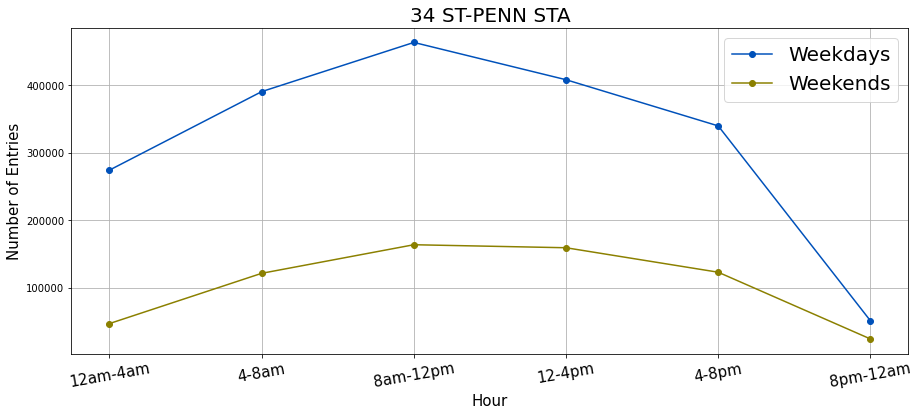

In [788]:
draw('34 ST-PENN STA')

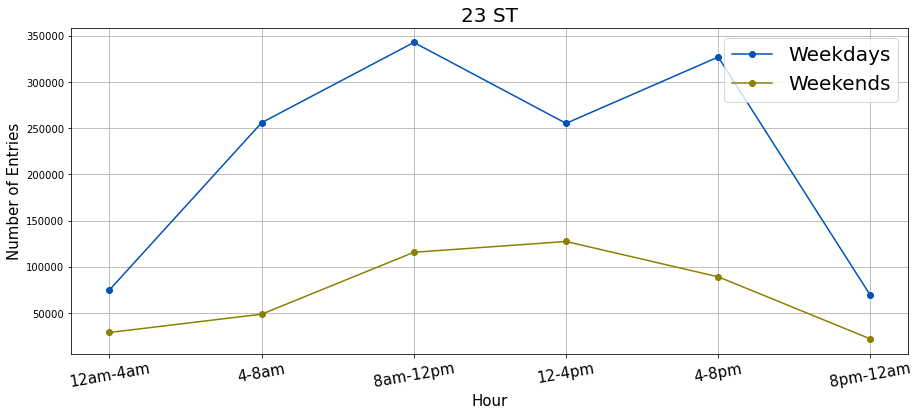

In [792]:
draw('23 ST')

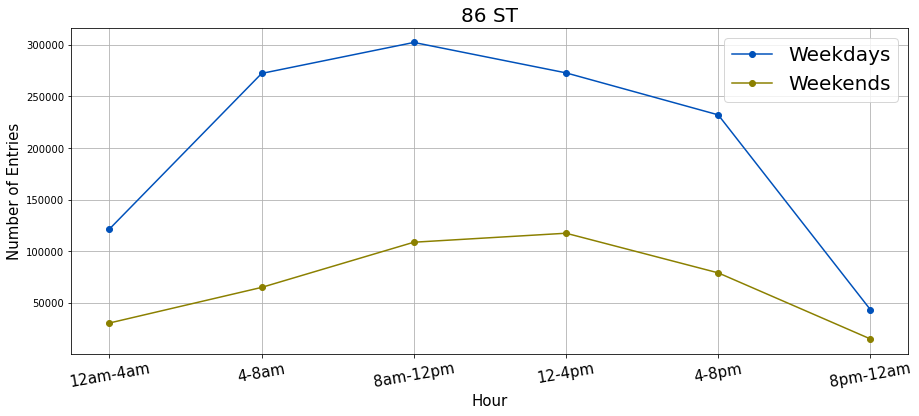

In [793]:
draw('86 ST')

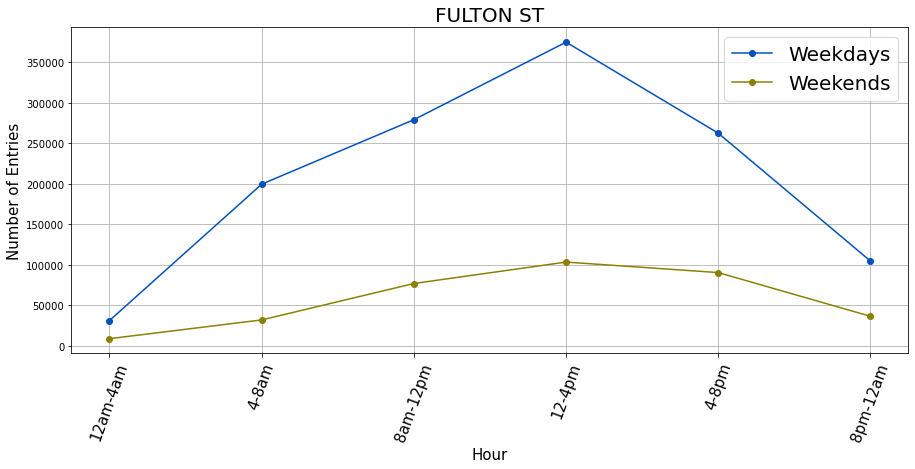

In [683]:
draw('FULTON ST')